### このファイルでやったこと
* 渋滞1つの場合の基本図のステップ数による変化
* 上記基本図の各密度における時空図とそのステップ数による変化

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_x0 import ds2s_OV_x0
from lib.funcs import *

### 渋滞を作る
すべての車両を最小車間距離で詰めた状態からスタートさせる

In [2]:
data = {}
for id, K in enumerate(range(101)):
	model = ds2s_OV_x0(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=0.1,
		x_init=np.array([0.1 * i for i in range(K)], dtype=np.float64),
		n_max=10010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = {
		label: flow
			for label, flow in [(
					"{} {}".format(1000*i, 1000*i+100),
	 				model.flow(1000*i, 1000*i+100)
				) for i in range(10)]
	}
	data[id] = js

In [23]:
density = [js["density"] for js in data.values()]
flow = [js["flow"]["2000 2100"] for js in data.values()]

#### ステップの増加による基本図の変化
* 流量は基本図の増加によって変化していないことがわかる(9000ステップ程度まで)

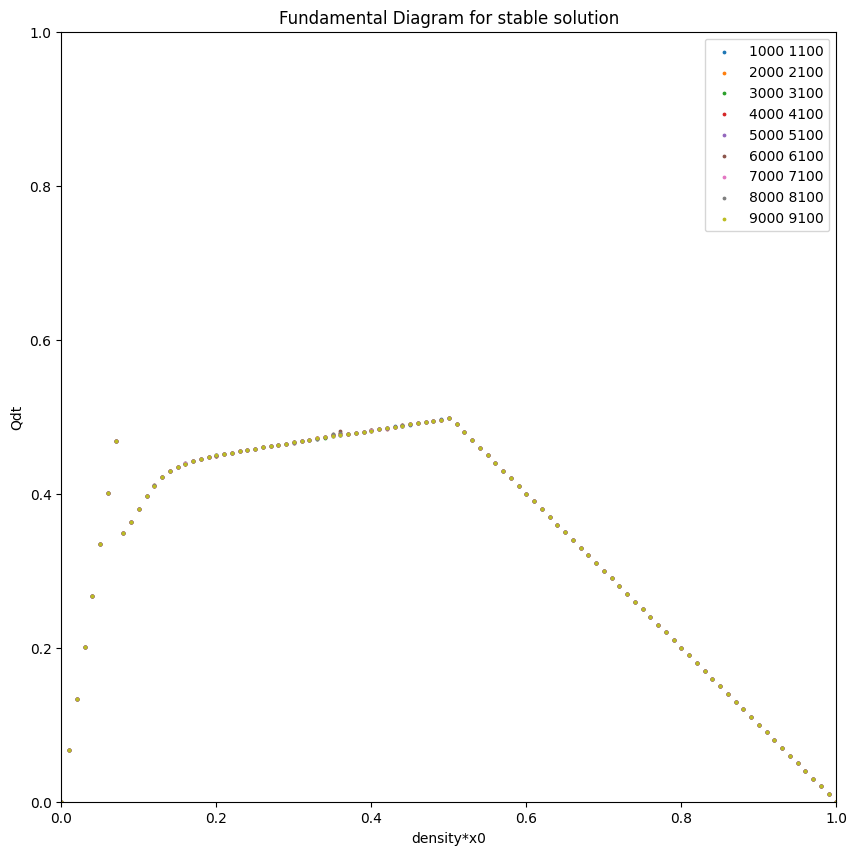

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 1.0))
ax.set_xlabel("density*x0")
ax.set_ylabel("Qdt")
ax.set_title("Fundamental Diagram for stable solution")
for i in range(1, 10):
	density = [js["density"] for js in data.values()]
	flow = [js["flow"]["{} {}".format(1000*i, 1000*i+100)] for js in data.values()]
	ax.scatter(density, flow, label="{} {}".format(1000*i, 1000*i+100), s=3)
ax.legend()
plt.show()

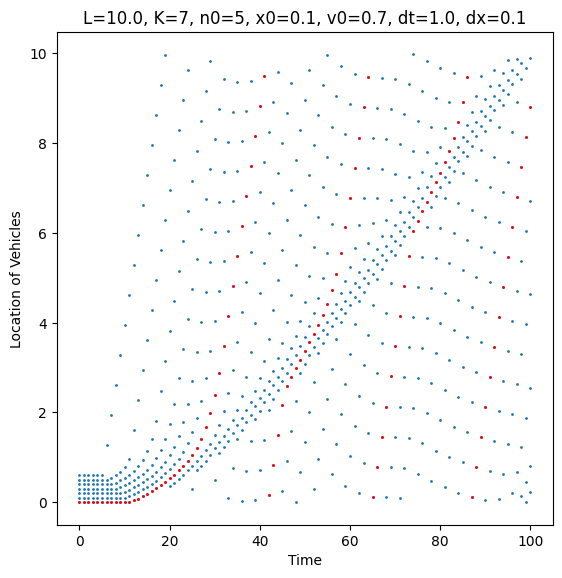

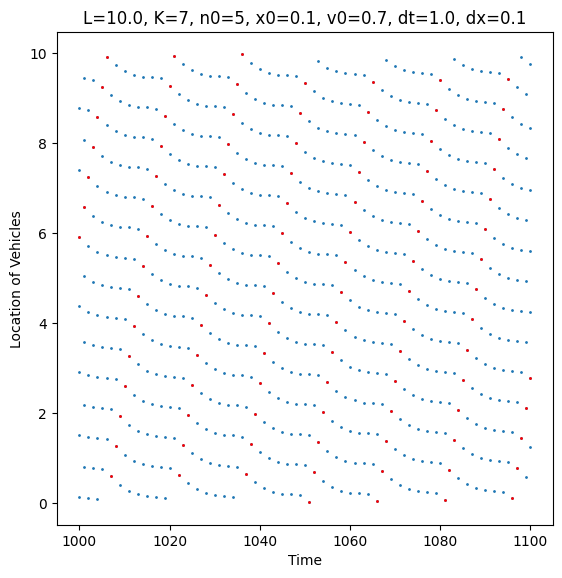

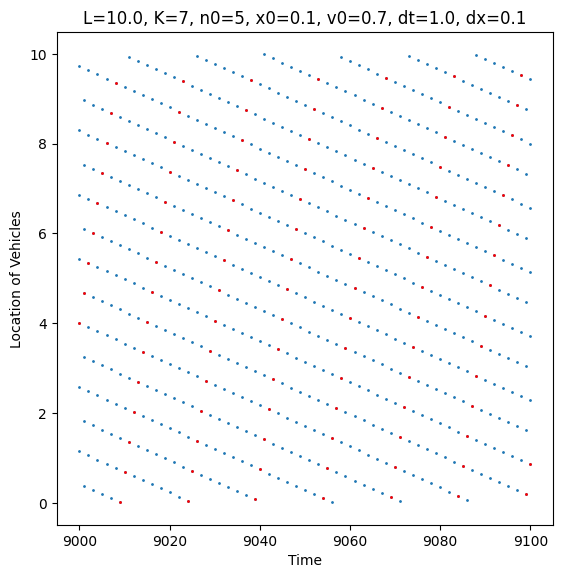

In [19]:
# 渋滞が解消する場合の時空図
model = ds2s_OV_x0.from_json(json=data[7], n_max=10000)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 1000, 1100)
plot_pattern(model, 9000, 9100)

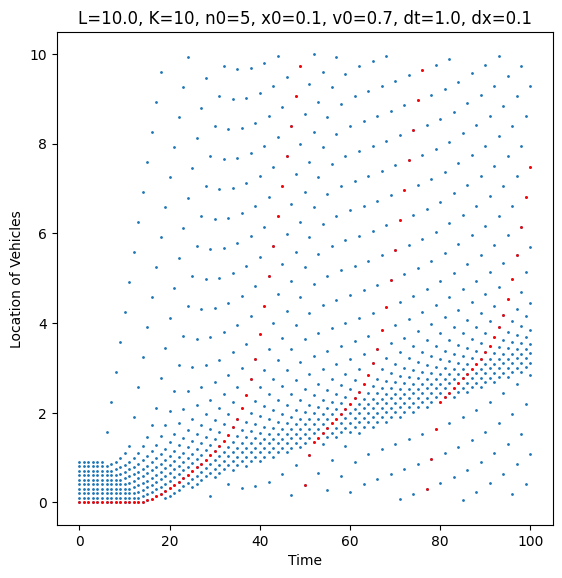

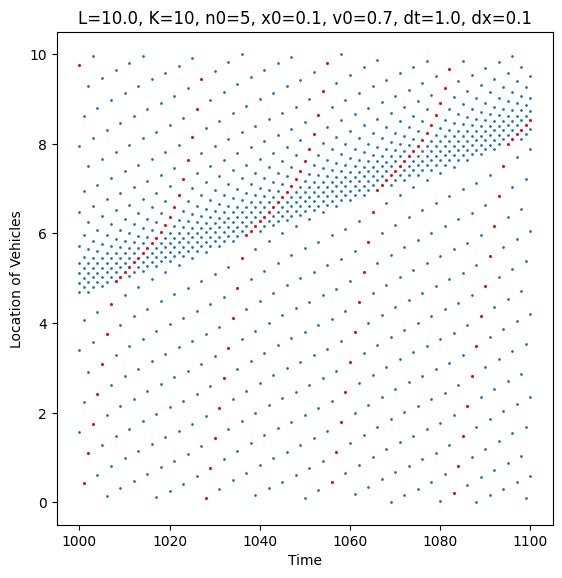

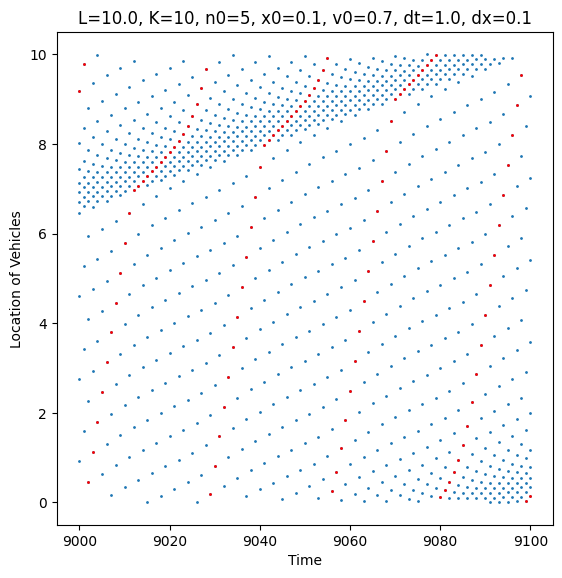

In [18]:
# 中間の密度のうち、傾きが大きいケースの時空図
model = ds2s_OV_x0.from_json(json=data[10], n_max=10000)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 1000, 1100)
plot_pattern(model, 9000, 9100)

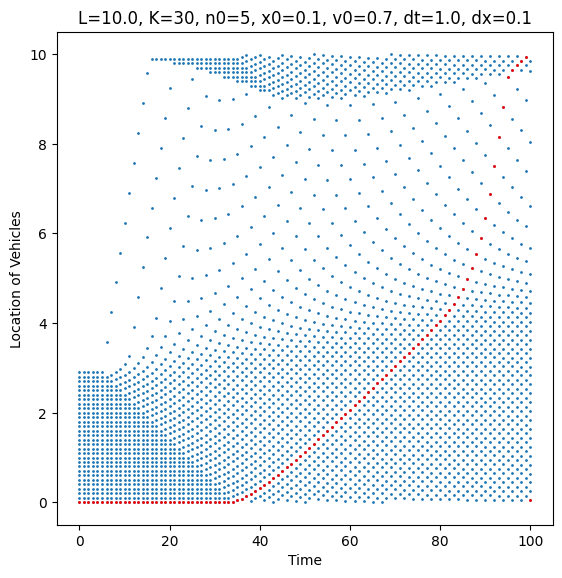

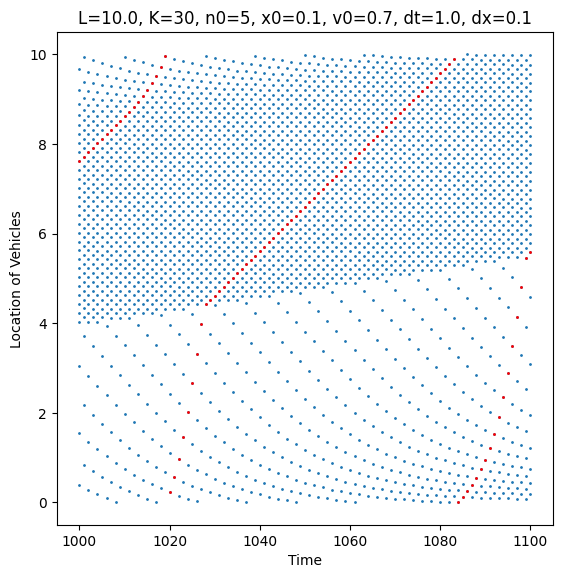

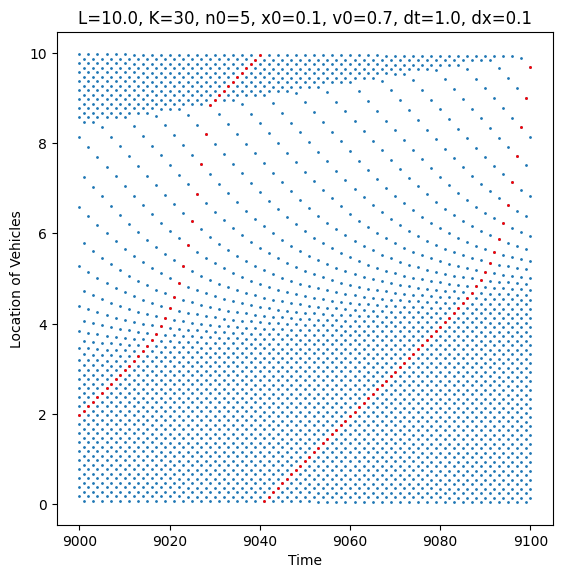

In [20]:
# 中間の密度のうち、傾きが小さいケースの時空図
model = ds2s_OV_x0.from_json(json=data[30], n_max=10000)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 1000, 1100)
plot_pattern(model, 9000, 9100)

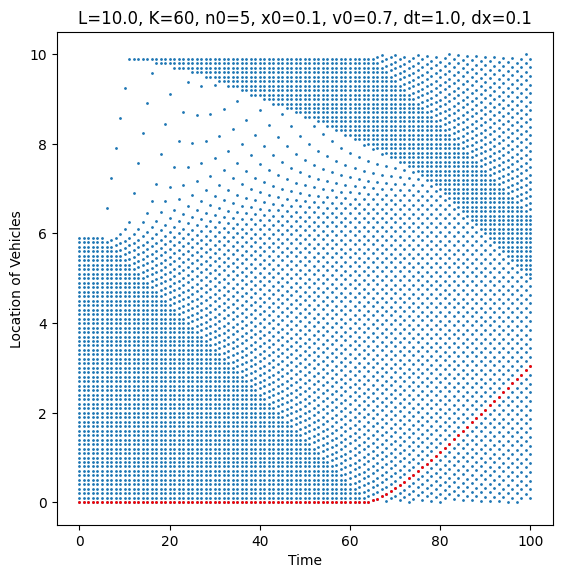

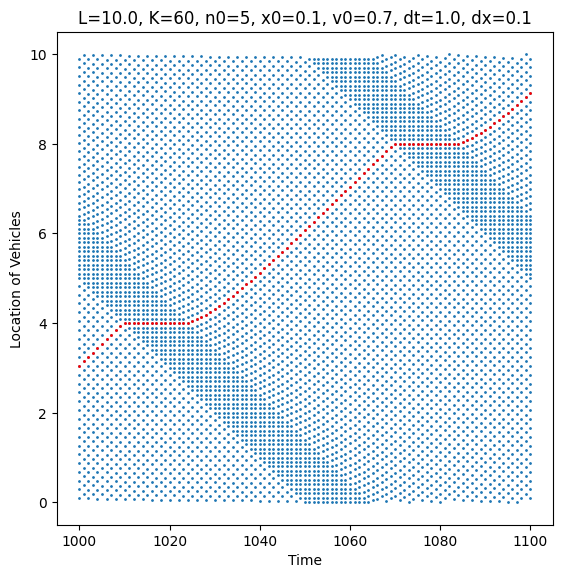

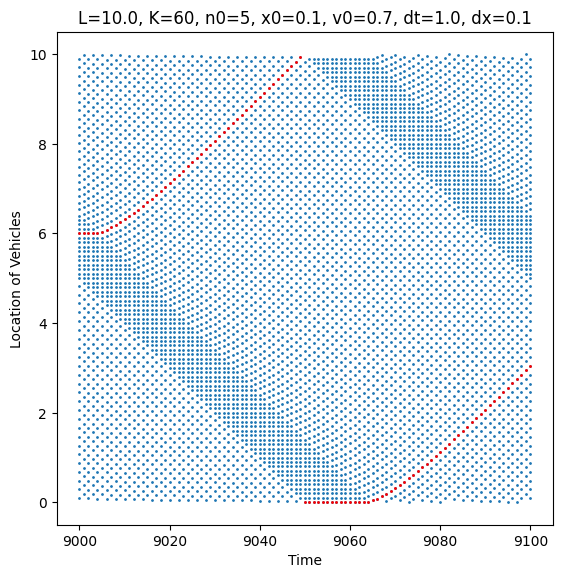

In [21]:
# minが支配的なケースの時空図
model = ds2s_OV_x0.from_json(json=data[60], n_max=10000)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 1000, 1100)
plot_pattern(model, 9000, 9100)

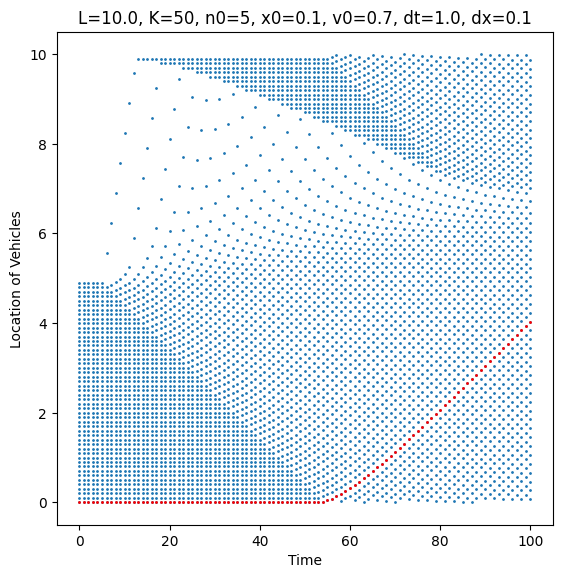

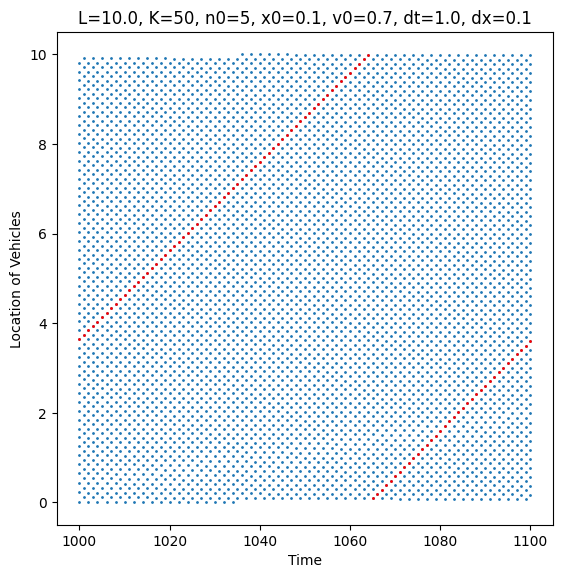

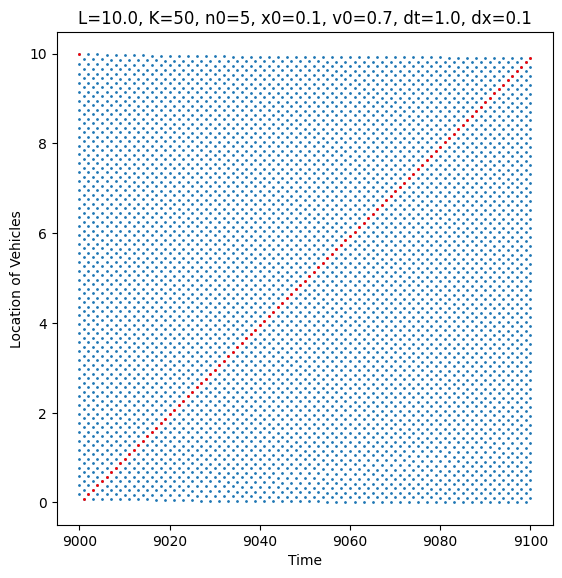

In [29]:
# 既存の最適速度関数支配的 -> min支配的の境界
model = ds2s_OV_x0.from_json(json=data[flow.index(max(flow[40:60]))], n_max=10000)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 1000, 1100)
plot_pattern(model, 9000, 9100)